Импорт требуемых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Модели регрессии и классификации
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

import numpy as np

# Кластеризация

Возьмём набор данных https://archive.ics.uci.edu/dataset/1031/dataset+for+assessing+mathematics+learning+in+higher+education
  
## 1 часть  
### 1. Скачать один из наборов данных
### 2. Загрузить данные в датафрейм
### 3. Вывести статистическую информацию о наборе данных
### 4. Вывести названия столбцов и строк
### 5. Заменить категориальные данные количественными

In [2]:
def load_data(file_path):
    """Загрузка набора данных из файла."""
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    elif file_path.endswith('.parquet'):
        return pd.read_parquet(file_path)
    else:
        raise ValueError("Неподдерживамый формат. Укажите CSV, Excel, JSON или Parquet файл.")

def data_statistics(df, statistic = 'count'):
    """Отображение базовой статистики данных и построение распределений всех признаков на одном графике."""

    # Отображаем базовую статистику
    display(df.describe())

    # Выводим первые строки датафрейма
    print("Верхние строки:")
    display(df.head())

def convert_categorical(df):
    """Преобразование категориальных данных в числовые."""
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype(int)
        label_encoders[column] = le
    return df, label_encoders


file_path = 'MathE dataset.xlsx'
df = load_data(file_path)
data_statistics(df)
df, label_encoders = convert_categorical(df)
df.dtypes

,Type of Answer,Question ID,Student ID
count,9546.000000,9546.000000,9546.000000
mean,0.468259,478.912319,775.402263
std,0.499018,249.244061,460.590559
min,0.000000,77.000000,26.000000
25%,0.000000,323.000000,380.000000
50%,0.000000,428.000000,885.000000
75%,1.000000,571.000000,1219.000000
max,1.000000,1549.000000,1565.000000


Верхние строки:


,Type of Answer,Student Country,Question ID,Question Level,Topic,Subtopic,Keywords,Student ID
0,0,Ireland,77,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl...",647
1,1,Portugal,77,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl...",41
2,1,Portugal,77,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl...",340
3,0,Italy,77,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl...",641
4,1,Portugal,77,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl...",669


Type of Answer     int64
Student Country    int32
Question ID        int64
Question Level     int32
Topic              int32
Subtopic           int32
Keywords           int32
Student ID         int64
dtype: object

### 6. Визуализировать данные с помощью Matplotlib и Seaborn
#### 1. Должно быть не менее 2х визуализаций на каждый признак

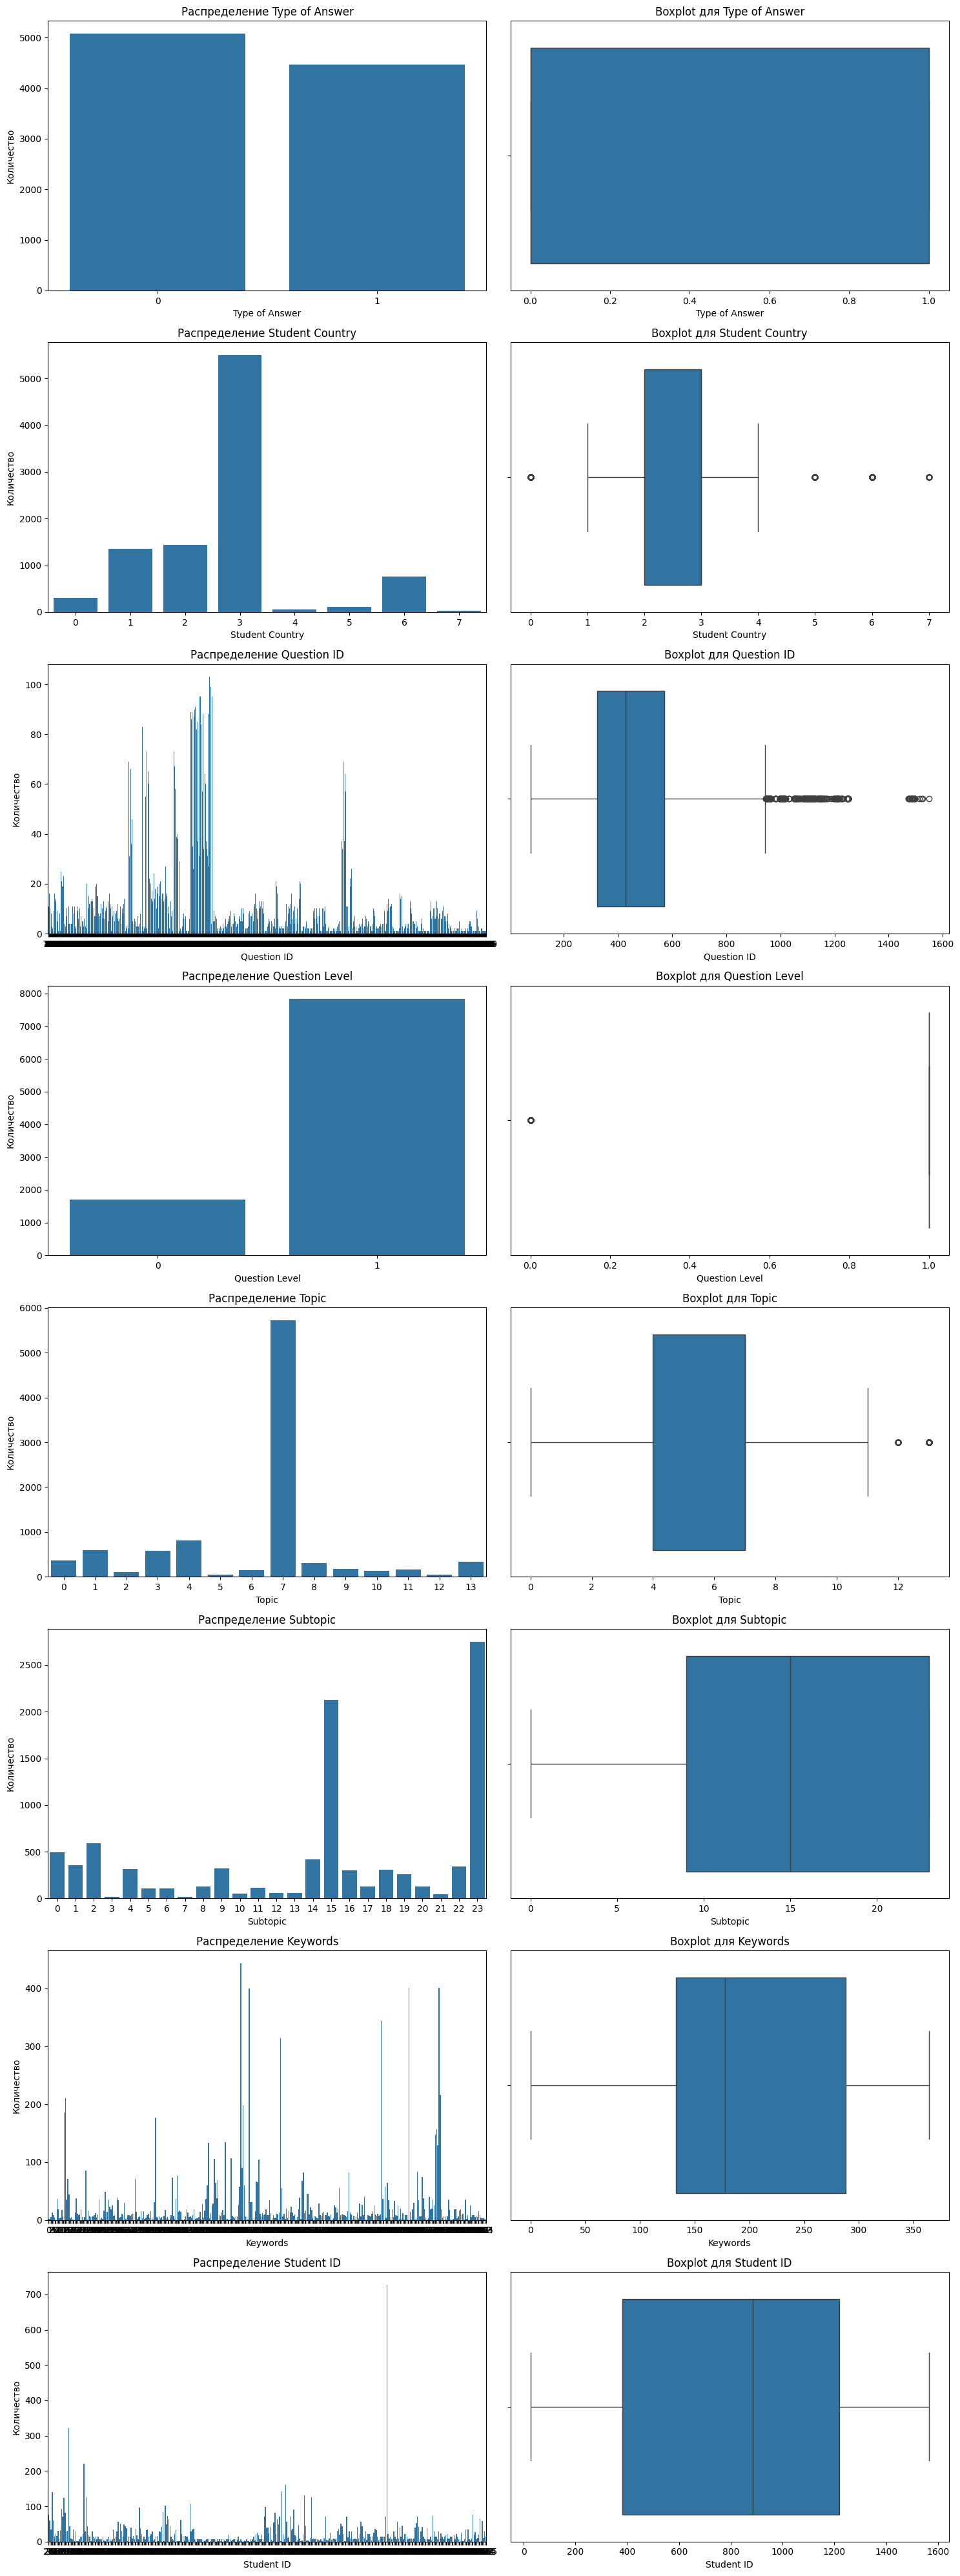

In [3]:
def visualize_data(df):
    """Визуализация данных."""
        # Получаем числовые и категориальные признаки
    numeric_columns = df.select_dtypes(include=['float64']).columns
    categorical_columns = df.select_dtypes(exclude=['float64']).columns#['object', 'bool', 'int64']).columns

    # Количество графиков
    cols = 2  # Количество столбцов в сетке графиков
    rows = len(numeric_columns) + len(categorical_columns)  # Количество строк

    # Создаем субплоты
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()

    # Визуализация числовых признаков
    for i, column in enumerate(numeric_columns):
        # Гистограмма
        sns.histplot(df[column],
                     kde=True,
                     kde_kws={'bw_adjust': 3, 'cut': 0},  # Настройка ширины ядра и границ KDE
                     stat='density',
                     bins=int(np.sqrt(len(df[column]))),  # Оптимальное количество бинов
                     discrete=True,
                     ax=axes[2*i])  # Гистограмма в первом столбце
        axes[2*i].set_title(f'Распределение {column}')
        axes[2*i].set_xlabel(column)
        axes[2*i].set_ylabel('Плотность')
        axes[2*i].set_xlim(df[column].min(), df[column].max())

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[2*i+1], orient='h')  # Boxplot во втором столбце
        axes[2*i+1].set_title(f'Boxplot для {column}')

    # Визуализация категориальных признаков
    for i, column in enumerate(categorical_columns, len(numeric_columns)):
        # Гистограмма (countplot для категориальных данных)
        sns.countplot(x=df[column], ax=axes[2*i])
        axes[2*i].set_title(f'Распределение {column}')
        axes[2*i].set_xlabel(column)
        axes[2*i].set_ylabel('Количество')

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[2*i + 1], orient='h')
        axes[2*i + 1].set_title(f'Boxplot для {column}')

    plt.tight_layout()
    plt.show()

visualize_data(df)

#### 2. Должно быть не менее 3х групповых визуализаций

Зависимости всех признаков друг от друга:


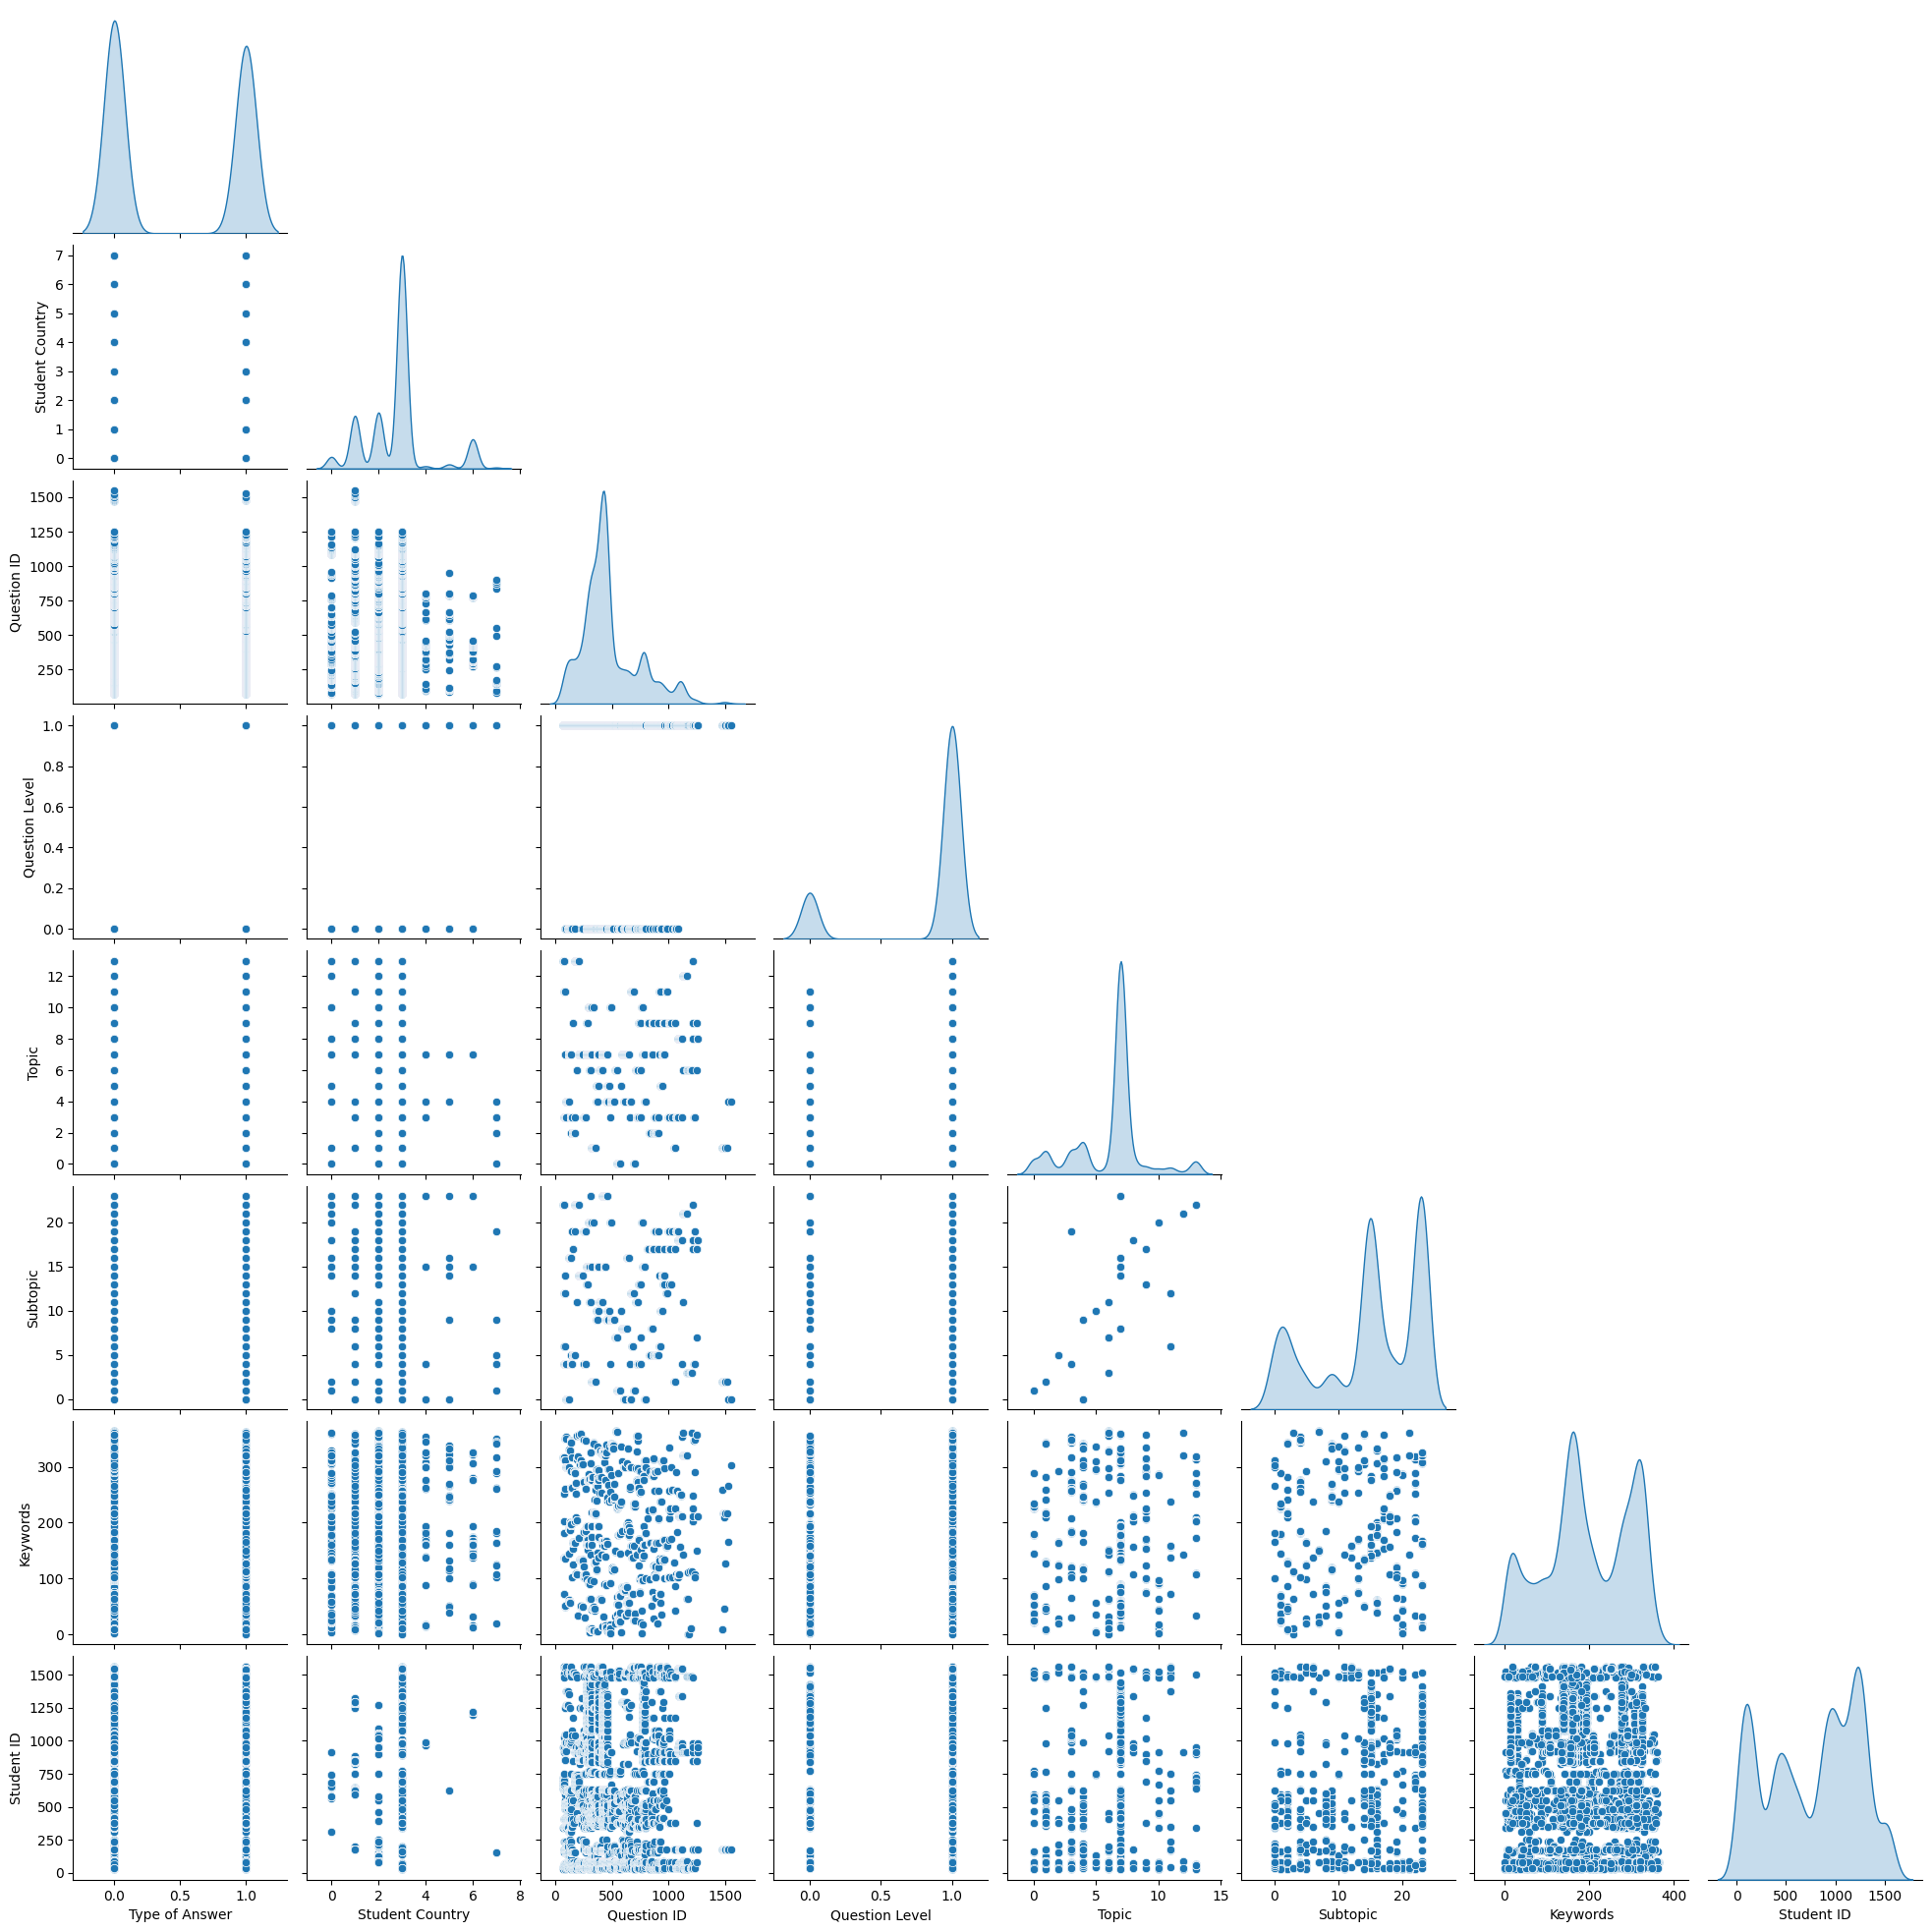

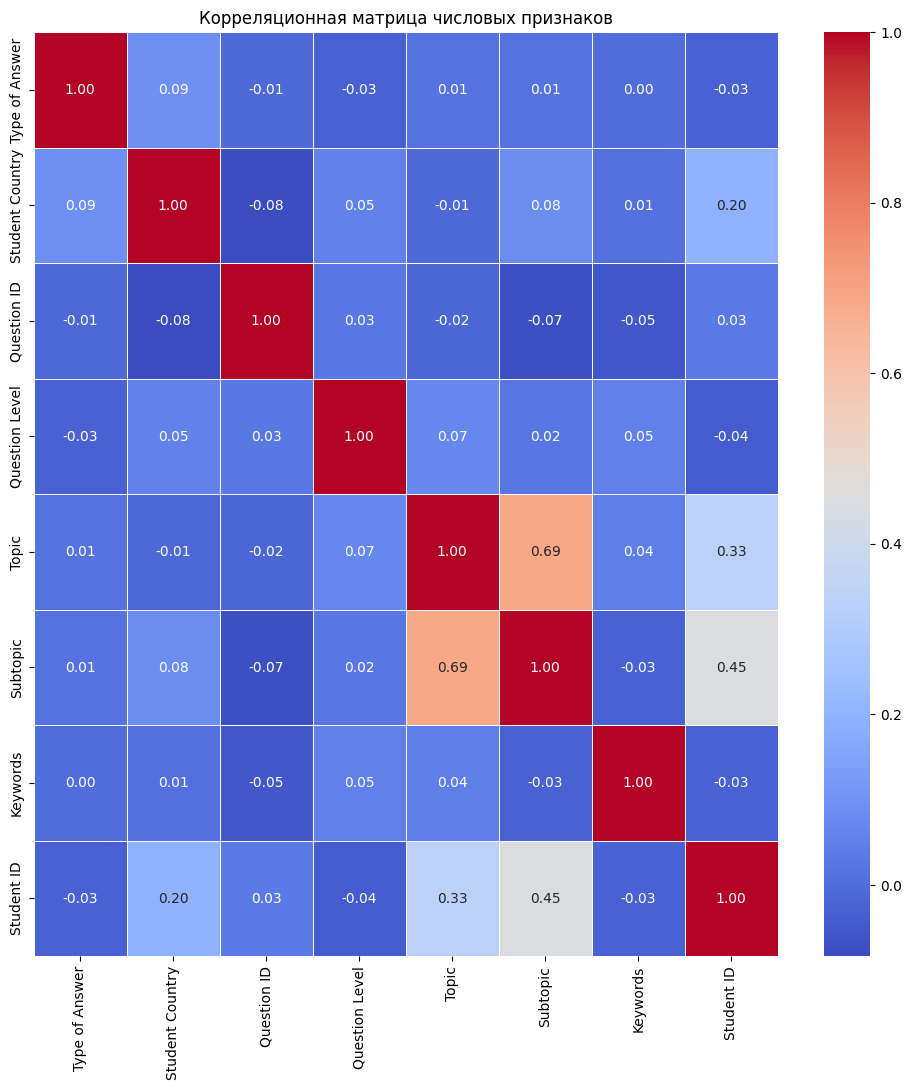

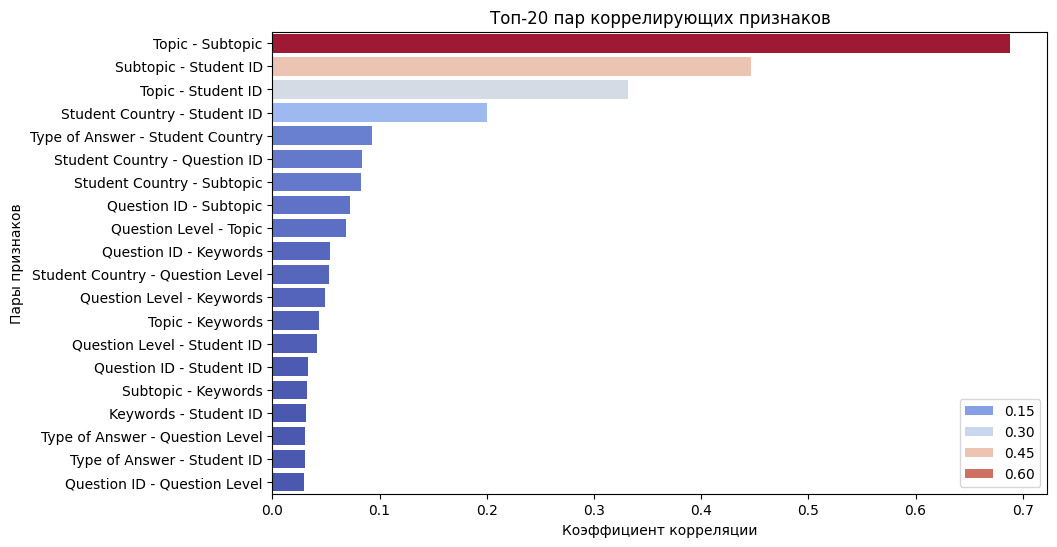

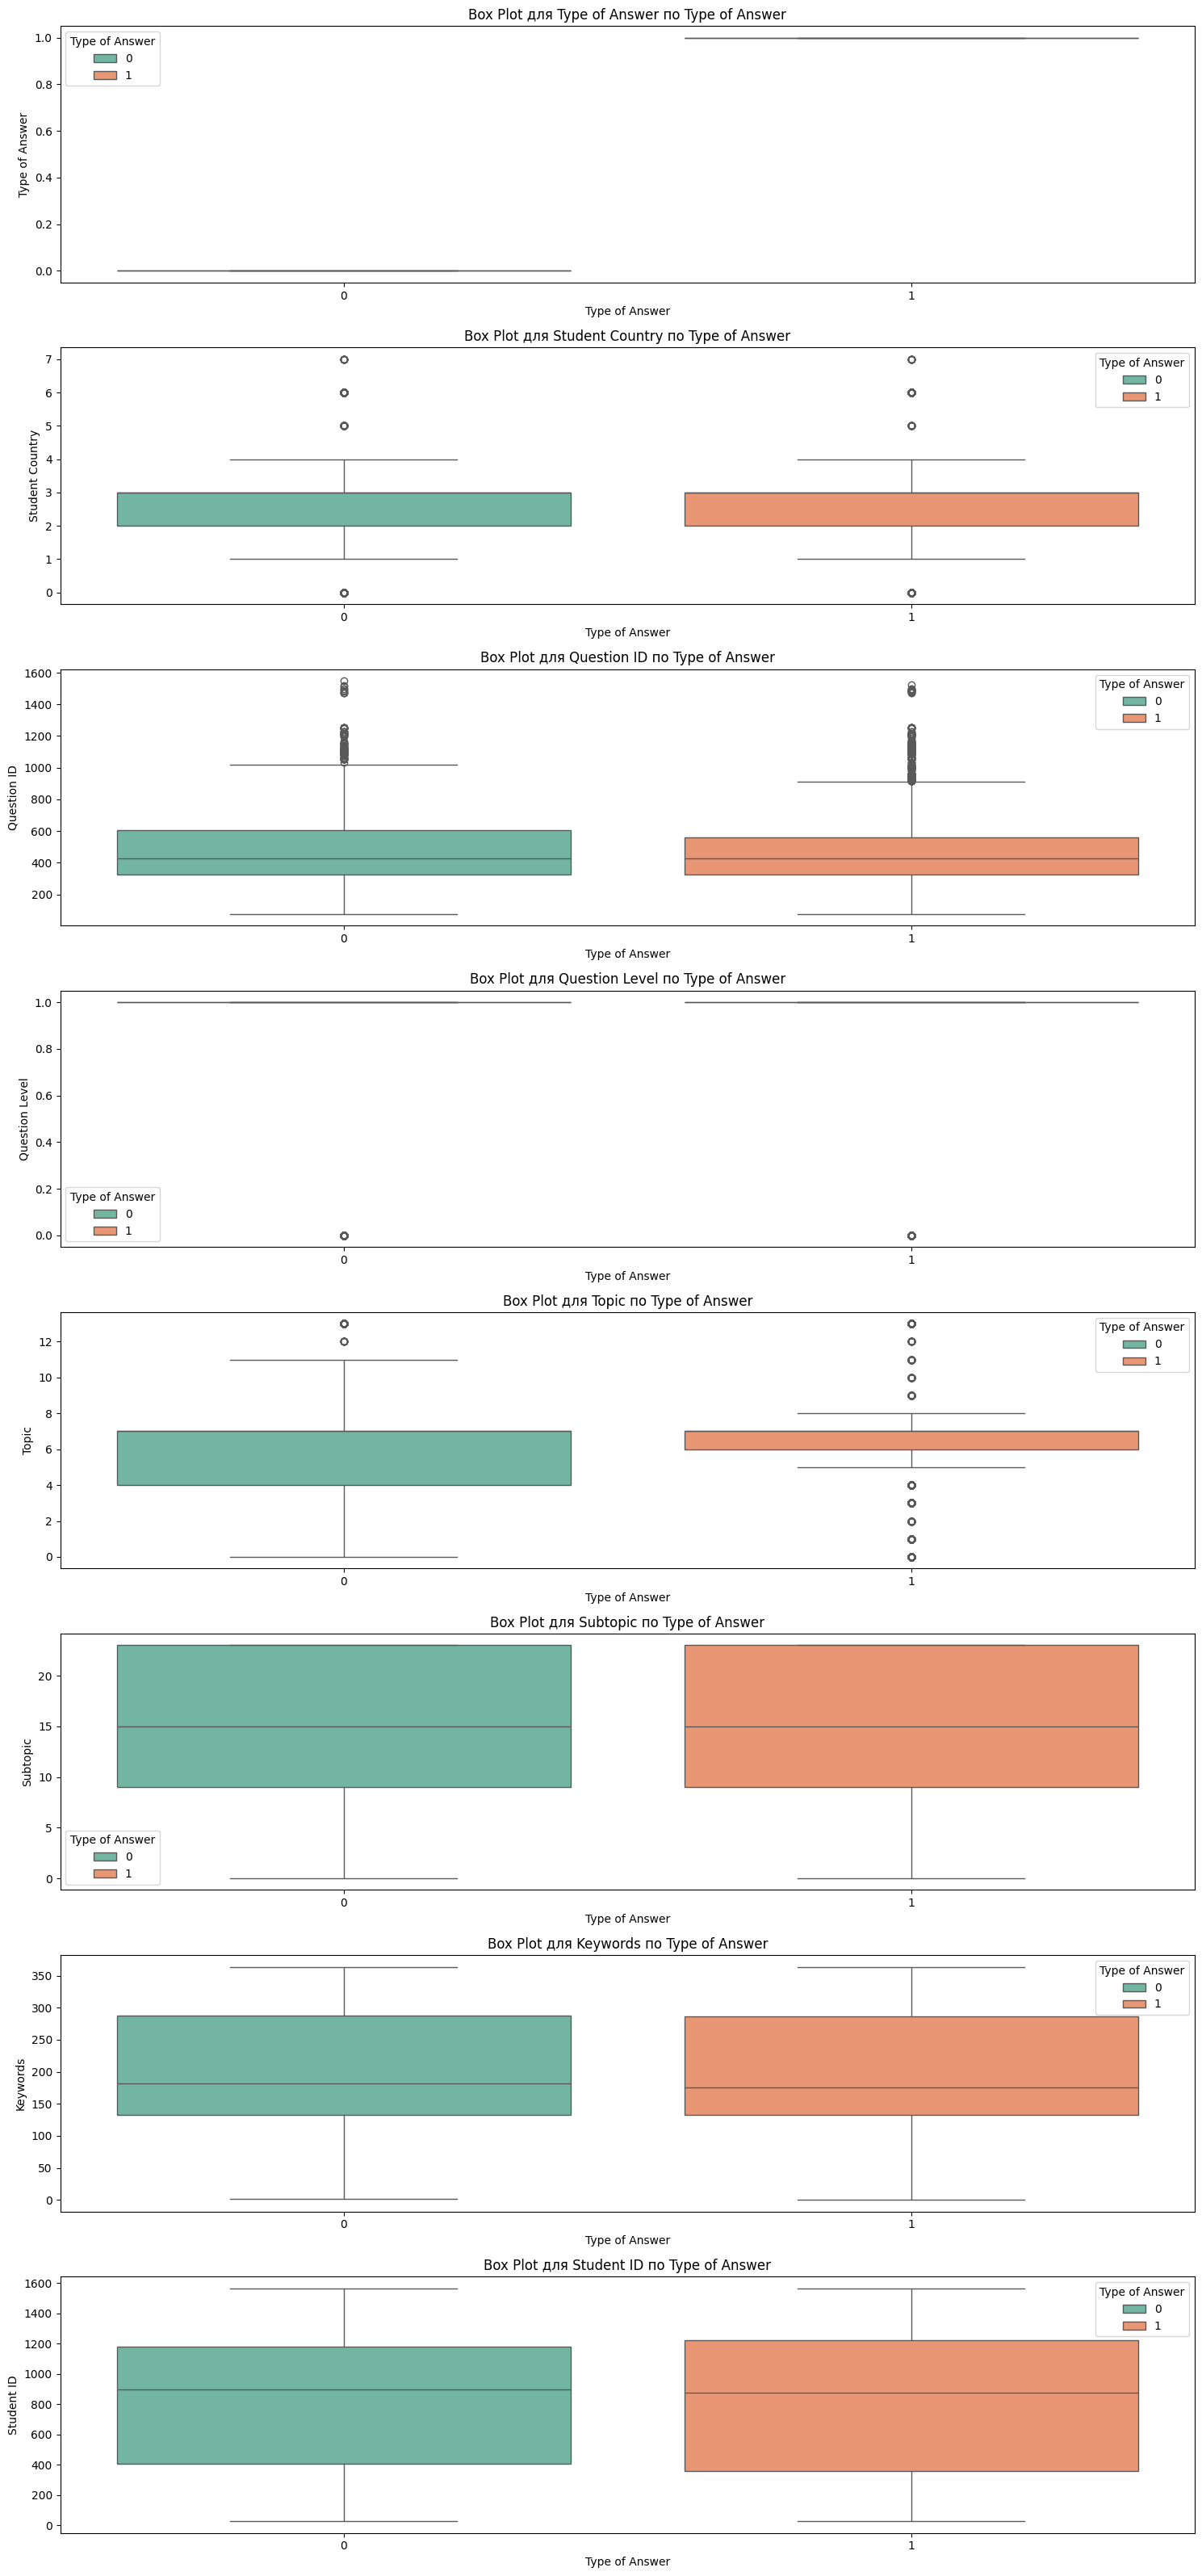

In [4]:
def visualize_data_groups(df,way=0):
    """Групповая визуализация данных: pairplot, heatmap и FacetGrid."""

    # Получаем числовые и категориальные признаки
    numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    categorical_columns = df.select_dtypes(exclude=['float64', 'int64', 'int32']).columns #['object', 'bool']

    # Pairplot для всех признаков
    print('Зависимости всех признаков друг от друга:')
    sns.pairplot(df, diag_kind='kde', corner=True)  # corner=True убирает зеркальные дубликаты
    plt.show()

    # Увеличиваем размер графика для heatmap
    plt.figure(figsize=(12, 12))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Корреляционная матрица числовых признаков')
    plt.show()

    # Вычисление корреляций
    corr_matrix = df[numeric_columns].corr().abs()

    # Выбираем верхний треугольник корреляционной матрицы (чтобы избежать дубликатов)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)

    # Превращаем корреляционную матрицу в серию и сортируем по убыванию
    corr_pairs = corr_matrix.unstack().dropna().sort_values(ascending=False)

    # Выводим топ-N пар с наибольшей корреляцией
    top_n = 20  # Число выводимых пар
    top_corr_pairs = corr_pairs.head(top_n)

    # Построение горизонтальной гистограммы для топ корреляций
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_corr_pairs.values, y=[f'{pair[0]} - {pair[1]}' for pair in top_corr_pairs.index],
                hue=top_corr_pairs.values, palette='coolwarm')
    plt.title(f'Топ-{top_n} пар коррелирующих признаков')
    plt.xlabel('Коэффициент корреляции')
    plt.ylabel('Пары признаков')
    plt.show()

def visualize_boxplots(df, categorical_column):
    """Построение групповых коробчатых диаграмм для всех числовых признаков по категориальному признаку."""

    numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    if len(numeric_columns) > 0 and categorical_column in df.columns:
        # Увеличиваем размер графика
        plt.figure(figsize=(15, len(numeric_columns) * 4))  # Высота зависит от количества числовых признаков

        for i, column in enumerate(numeric_columns):
            plt.subplot(len(numeric_columns), 1, i + 1)  # Создаём подграфик для каждого числового признака
            sns.boxplot(x=df[categorical_column], y=df[column], hue=df[categorical_column], palette='Set2')
            plt.title(f'Box Plot для {column} по {categorical_column}')
            plt.xlabel(categorical_column)
            plt.ylabel(column)

        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно числовых признаков или указанный категориальный признак отсутствует.")

visualize_data_groups(df)
visualize_boxplots(df,'Type of Answer')

## 2 часть  
### 7. Выбрать целевую переменную  
### 8. Выяснить важность признаков (влияние их на значение целевой переменной)  
### 9. Выбрать классификаторы (не менее 3х разных), обучить их  
### 10. Вычислить метрики  
### 11. Проанализировать полученные результаты обучения модели

Уменьшим размерность данных с помощью PCA и визуализируем результаты кластеризации.


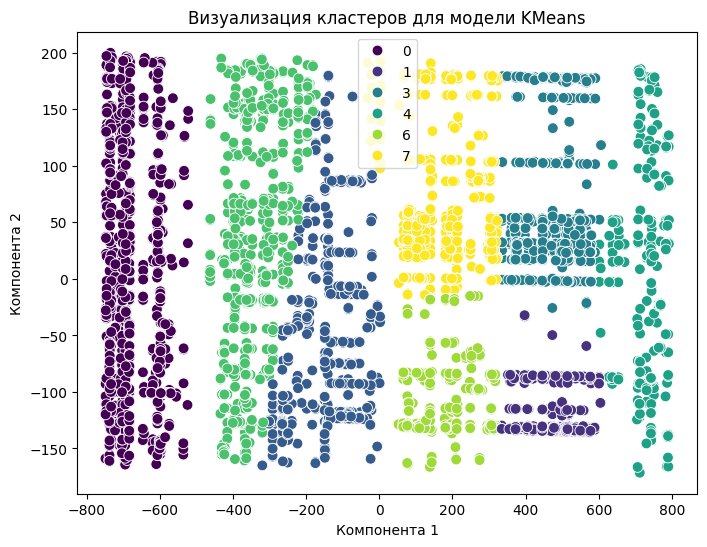

Уменьшим размерность данных с помощью PCA и визуализируем результаты кластеризации.


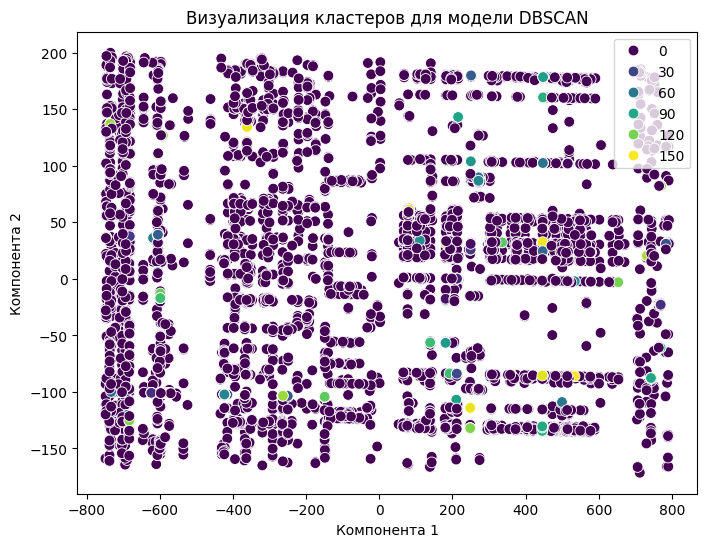

Уменьшим размерность данных с помощью PCA и визуализируем результаты кластеризации.


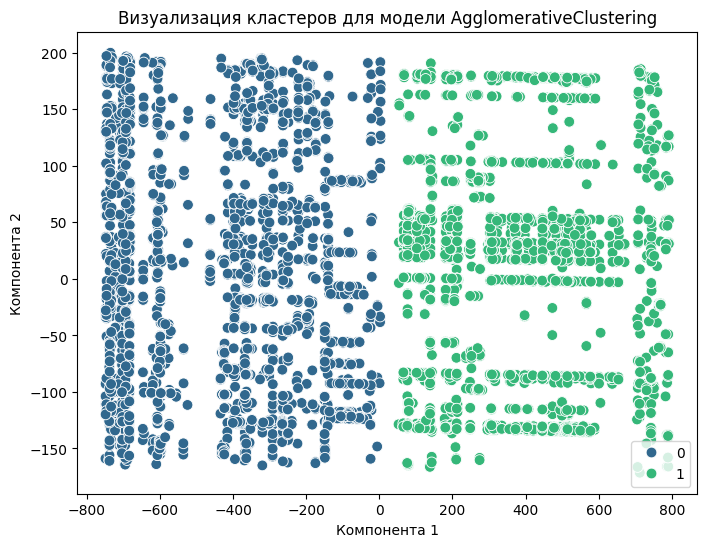

,Model,Silhouette Score
0,KMeans,0.460417
1,DBSCAN,-0.563671
2,AgglomerativeClustering,0.636978


Лучшая модель: AgglomerativeClustering с метриками:
Silhouette Score    0.636978
Name: AgglomerativeClustering, dtype: float64


In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def train_models(df, target_column, task='Regression'):
    """Обучение моделей для различных задач и вывод соответствующих метрик, а также визуализация корреляций с целевой переменной."""

    # Разделение на признаки и целевую переменную
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Вычисляем корреляцию между целевой переменной и остальными признаками (для регрессии)
    if task != 'Clusterization' and df[target_column].dtype != 'object':  # Проверяем, что целевая переменная числовая
        correlations = df.corr()[target_column].drop(target_column).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=correlations.values, hue=correlations.index, y=correlations.index, palette='coolwarm')
        plt.title(f'Корреляции признаков с целевой переменной {target_column}')
        plt.xlabel('Коэффициент корреляции')
        plt.ylabel('Признаки')
        plt.show()

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Список моделей в зависимости от задачи
    if task == 'Regression':
        models = {
            'RandomForestRegressor': RandomForestRegressor(),
            'SVR': SVR(),
            'LinearRegression': LinearRegression()
        }
        metric_functions = {
            'MSE': mean_squared_error,
            'MAE': mean_absolute_error,
            'R²': r2_score
        }
    elif task == 'Classification':
        models = {
            'RandomForestClassifier': RandomForestClassifier(),
            'SVM': SVC(),
            'LogisticRegression': LogisticRegression(dual=False)
        }
        metric_functions = {
            'Accuracy': accuracy_score,
            'Precision': lambda y_true, y_pred: classification_report(y_true, y_pred, zero_division=0.0, output_dict=True)['weighted avg']['precision'],
            'Recall': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)['weighted avg']['recall']
        }
        import warnings
        warnings.filterwarnings('ignore')
    elif task == 'Clusterization':
        models = {
            'KMeans': KMeans(),
            'DBSCAN': DBSCAN(),
            'AgglomerativeClustering': AgglomerativeClustering()
        }
        metric_functions = {
            'Silhouette Score': silhouette_score
        }

    # DataFrame для хранения метрик
    metrics_df = pd.DataFrame(columns=['Model'] + list(metric_functions.keys()))

    # Обучение моделей и расчет метрик
    for name, model in models.items():
        if task == 'Clusterization':
            model.fit(X_train)
            if hasattr(model, 'labels_'):
                y_pred = model.labels_
            else:
                y_pred = model.predict(X_train)
            if len(set(y_pred)) <= 1:  # Проверяем наличие более одного кластера
                print(f"{name} не смог создать более одного кластера.")
                continue
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Вычисление всех метрик
        metrics = {'Model': name}
        for metric_name, metric_func in metric_functions.items():
            if task == 'Clusterization':
                if metric_name == 'Silhouette Score' and len(set(y_pred)) > 1:
                    metrics[metric_name] = metric_func(X_train, y_pred)
            else:
                metrics[metric_name] = metric_func(y_test, y_pred)

        # Добавление метрик в DataFrame
        metrics_df.loc[len(metrics_df)] = metrics

        # Визуализация кластеров
        if task == 'Clusterization':
            print("Уменьшим размерность данных с помощью PCA и визуализируем результаты кластеризации.")
            # Применяем PCA для снижения размерности данных
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_train)
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='viridis', s=60)
            plt.title(f'Визуализация кластеров для модели {name}')
            plt.xlabel('Компонента 1')
            plt.ylabel('Компонента 2')
            plt.show()

    # Вывод DataFrame с результатами
    display(metrics_df)

    # Анализ результатов обучения
    best_model = metrics_df.set_index('Model').mean(axis=1).idxmax()  # Модель с наилучшей средней метрикой
    best_metrics = metrics_df.set_index('Model').loc[best_model]
    print(f"Лучшая модель: {best_model} с метриками:\n{best_metrics}")

# Пример вызова функции
train_models(df, 'Question ID', 'Clusterization')

На основании представленных метрик кластеризации вопросов можно сделать следующие выводы:

### Общий анализ:
- **Silhouette Score** — это ключевая метрика для оценки качества кластеризации. Она показывает, насколько хорошо объекты внутри одного кластера схожи между собой, а также насколько далеко они находятся от объектов других кластеров.
- Значения **Silhouette Score** варьируются от -1 до 1:
  - Значение около 1 означает, что кластеры хорошо разделены.
  - Значение около 0 указывает на пересечение или нечеткость границ кластеров.
  - Отрицательные значения указывают на неправильное распределение объектов по кластерам.
  
### Разбор моделей:

1. **KMeans (Silhouette Score = 0.454785)**:
   - Значение Silhouette Score говорит о том, что кластеры, полученные с помощью KMeans, **относительно хорошо разделены**, но границы между кластерами всё же могут быть нечеткими.
   - Это значение можно считать приемлемым, но его можно улучшить с помощью настройки гиперпараметров модели, например, количества кластеров.

2. **DBSCAN (Silhouette Score = -0.563671)**:
   - Отрицательный Silhouette Score указывает на то, что **модель DBSCAN не смогла адекватно кластеризовать данные**. Это может означать, что модель неправильно распределила данные по кластерам, или что большинство точек были помечены как "шум".
   - Возможно, параметры DBSCAN (такие как радиус ε и минимальное количество точек в кластере) были выбраны неправильно, что привело к такому результату.

3. **AgglomerativeClustering (Silhouette Score = 0.636978)**:
   - Наилучший результат по Silhouette Score среди всех моделей. Значение 0.636978 означает, что **модель агломеративной кластеризации разделила данные на хорошо различимые кластеры**.
   - Это высокое значение Silhouette Score указывает на то, что объекты внутри кластеров похожи, а объекты разных кластеров чётко разделены.

### Заключение:
- **AgglomerativeClustering** является наилучшей моделью для кластеризации вопросов, так как показывает высокий Silhouette Score (0.636978), что говорит о чётких границах между кластерами.
- **KMeans** также показал приемлемый результат (0.454785), но требует дальнейшей настройки.
- **DBSCAN** не справился с задачей, и его параметры необходимо пересмотреть, чтобы улучшить качество кластеризации.

В конечном итоге, можно использовать **AgglomerativeClustering** как основную модель, но стоит поработать над настройкой KMeans для возможного улучшения.